In [1]:
from scipy.stats import spearmanr

from bertscore import BERTScore
from conventional_metrics import BLEU, METEOR
from scm import SCM
from wmd import WMD
from common import Evaluator, LANGS
import pandas as pd


/Users/xstefan3/miniconda3/envs/ood/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
metrics = [
    BLEU(),
    METEOR(),
    BERTScore(tgt_lang="en"),
    WMD(tgt_lang="en"),
    SCM(tgt_lang="en")
]
correlations = {m.label: {} for m in metrics}
correlations["human"] = {}

for lang_pair in [pair for pair in LANGS if pair.split("-")[-1] == "en"]:
    print("Evaluating lang pair %s" % lang_pair)
    evaluator = Evaluator("data_dir", lang_pair, metrics)
    report = evaluator.evaluate()

    human_judgements = report["human"]
    for metric_label, vals in report.items():
        correlations[metric_label][lang_pair] = spearmanr(vals, human_judgements).correlation
    print(correlations)

corrs_df = pd.DataFrame(correlations)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xstefan3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xstefan3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xstefan3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Evaluating lang pair cs-en


  0%|          | 0/2687 [00:00<?, ?it/s]

{'BLEU': {'cs-en': 0.00948259297595841}, 'METEOR': {'cs-en': 0.40259685151100627}, 'BERTScore': {'cs-en': 0.5930617997403792}, 'WMD': {'cs-en': -0.35835693780579453}, 'SCM': {'cs-en': 0.24208020921663048}, 'human': {'cs-en': 1.0}}
Evaluating lang pair de-en


  0%|          | 0/2536 [00:00<?, ?it/s]

{'BLEU': {'cs-en': 0.00948259297595841, 'de-en': 0.12102257413942359}, 'METEOR': {'cs-en': 0.40259685151100627, 'de-en': 0.3053376412276852}, 'BERTScore': {'cs-en': 0.5930617997403792, 'de-en': 0.5358774903472495}, 'WMD': {'cs-en': -0.35835693780579453, 'de-en': -0.2794049110415977}, 'SCM': {'cs-en': 0.24208020921663048, 'de-en': 0.22130149941464233}, 'human': {'cs-en': 1.0, 'de-en': 1.0}}
Evaluating lang pair fi-en


  0%|          | 0/3009 [00:00<?, ?it/s]

{'BLEU': {'cs-en': 0.00948259297595841, 'de-en': 0.12102257413942359, 'fi-en': 0.0462238748656434}, 'METEOR': {'cs-en': 0.40259685151100627, 'de-en': 0.3053376412276852, 'fi-en': 0.2936207296967382}, 'BERTScore': {'cs-en': 0.5930617997403792, 'de-en': 0.5358774903472495, 'fi-en': 0.5136351336761734}, 'WMD': {'cs-en': -0.35835693780579453, 'de-en': -0.2794049110415977, 'fi-en': -0.24220902849855397}, 'SCM': {'cs-en': 0.24208020921663048, 'de-en': 0.22130149941464233, 'fi-en': 0.13076251346464637}, 'human': {'cs-en': 1.0, 'de-en': 1.0, 'fi-en': 1.0}}
Evaluating lang pair ru-en


SCM: 100%|██████████| 560/560 [00:00<00:00, 3254.69it/s]

{'BLEU': {'cs-en': 0.00948259297595841, 'de-en': 0.12102257413942359, 'fi-en': 0.0462238748656434, 'ru-en': 0.1372415117314687}, 'METEOR': {'cs-en': 0.40259685151100627, 'de-en': 0.3053376412276852, 'fi-en': 0.2936207296967382, 'ru-en': 0.40148627797493985}, 'BERTScore': {'cs-en': 0.5930617997403792, 'de-en': 0.5358774903472495, 'fi-en': 0.5136351336761734, 'ru-en': 0.5815337392270435}, 'WMD': {'cs-en': -0.35835693780579453, 'de-en': -0.2794049110415977, 'fi-en': -0.24220902849855397, 'ru-en': -0.317111517221105}, 'SCM': {'cs-en': 0.24208020921663048, 'de-en': 0.22130149941464233, 'fi-en': 0.13076251346464637, 'ru-en': 0.18393322736831474}, 'human': {'cs-en': 1.0, 'de-en': 1.0, 'fi-en': 1.0, 'ru-en': 1.0}}


<AxesSubplot:>

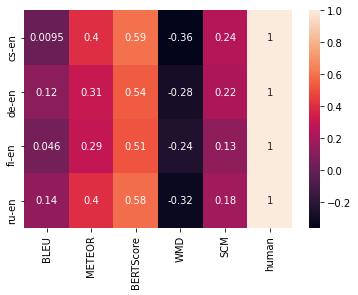

In [3]:
import seaborn as sns
sns.heatmap(corrs_df, annot=True)